# SocialLens

## 1. Load Libraries and Dataset

In [3]:

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:

df = pd.read_csv("personality_dataset.csv")
df.head(), df.shape


(   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
 0               4.0         No                      4.0            6.0   
 1               9.0        Yes                      0.0            0.0   
 2               9.0        Yes                      1.0            2.0   
 3               0.0         No                      6.0            7.0   
 4               3.0         No                      9.0            4.0   
 
   Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
 0                        No                 13.0             5.0   Extrovert  
 1                       Yes                  0.0             3.0   Introvert  
 2                       Yes                  5.0             2.0   Introvert  
 3                        No                 14.0             8.0   Extrovert  
 4                        No                  8.0             5.0   Extrovert  ,
 (2900, 8))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

<Axes: xlabel='Personality', ylabel='Count'>

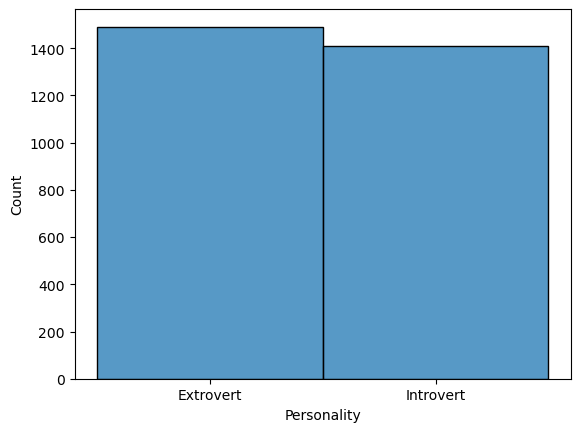

In [7]:
sns.histplot(df['Personality'])

In [8]:
df.duplicated().sum()

388

In [9]:
df = df.drop_duplicates()

In [10]:
df['Personality'].value_counts()

Personality
Extrovert    1417
Introvert    1095
Name: count, dtype: int64

In [11]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTarget Distribution:")
print(df['Personality'].value_counts())

Dataset Shape: (2512, 8)

Missing Values:
Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64

Target Distribution:
Personality
Extrovert    1417
Introvert    1095
Name: count, dtype: int64


C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\2943719540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Personality', palette='Set2')


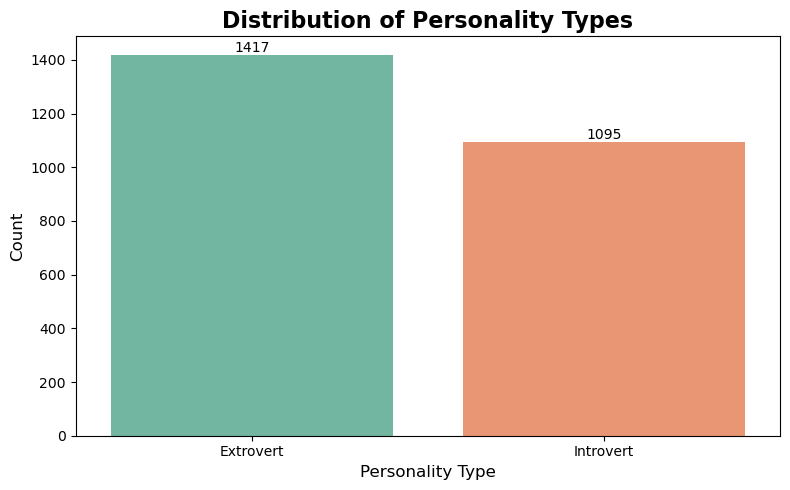

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Personality', palette='Set2')
plt.title('Distribution of Personality Types', fontsize=16, fontweight='bold')
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.tight_layout()
plt.show()

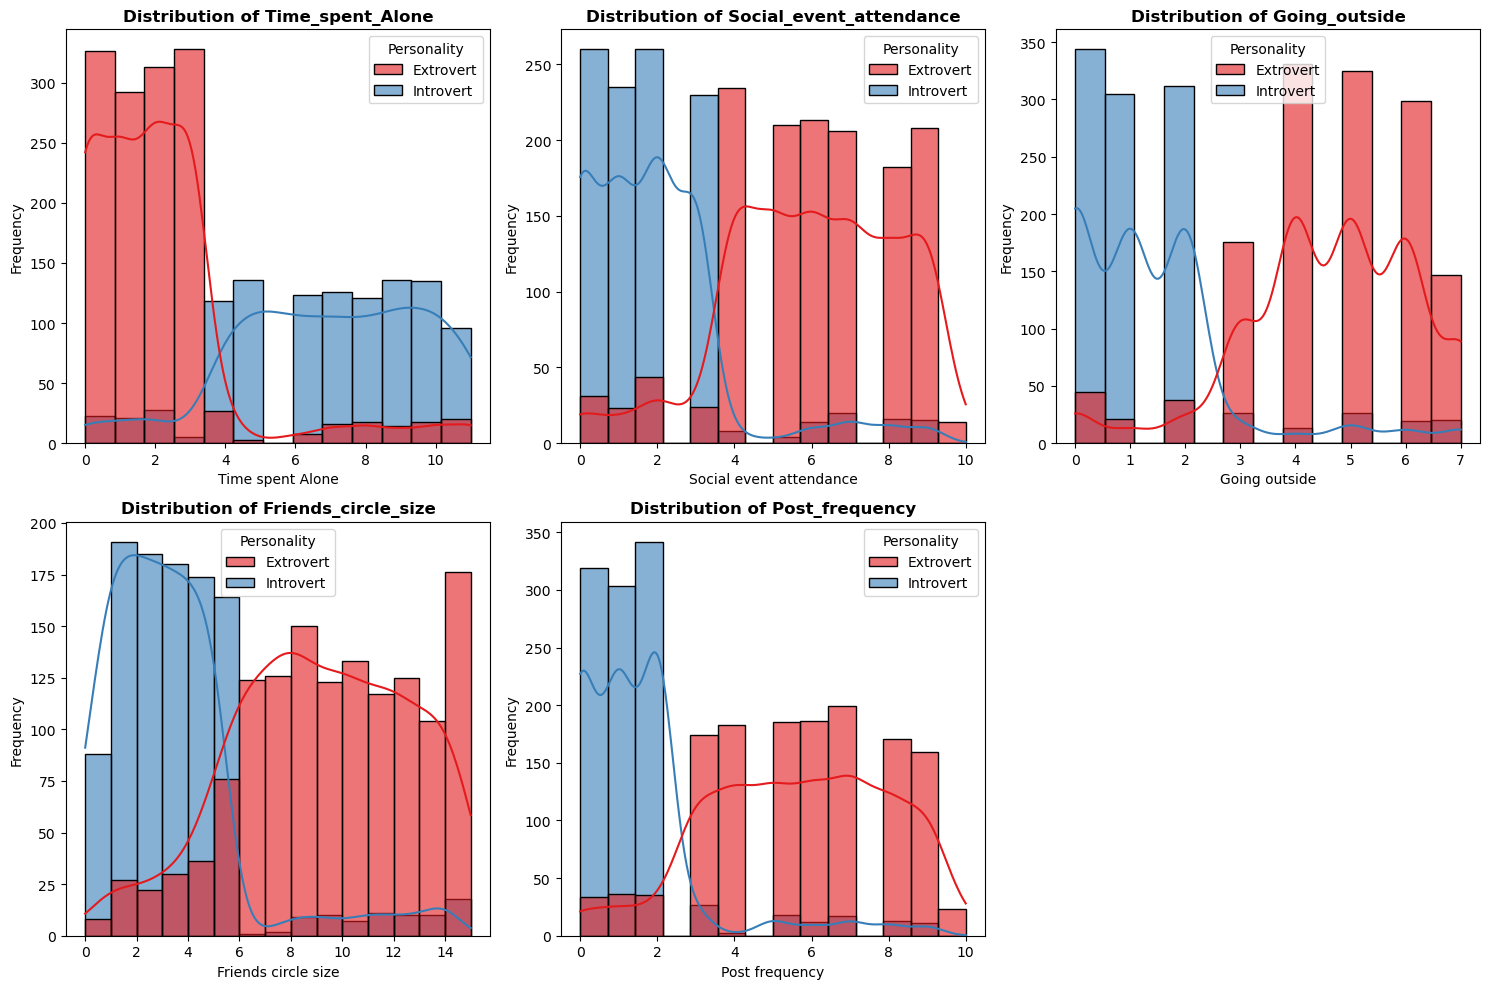

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    sns.histplot(data=df, x=col, hue='Personality', kde=True, ax=ax, palette='Set1', alpha=0.6)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' '), fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\177425247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Personality', ax=ax, palette='Set2')
C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\177425247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Personality', ax=ax, palette='Set2')
C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\177425247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='Personality', ax=ax, palette='Set2')
C:\User

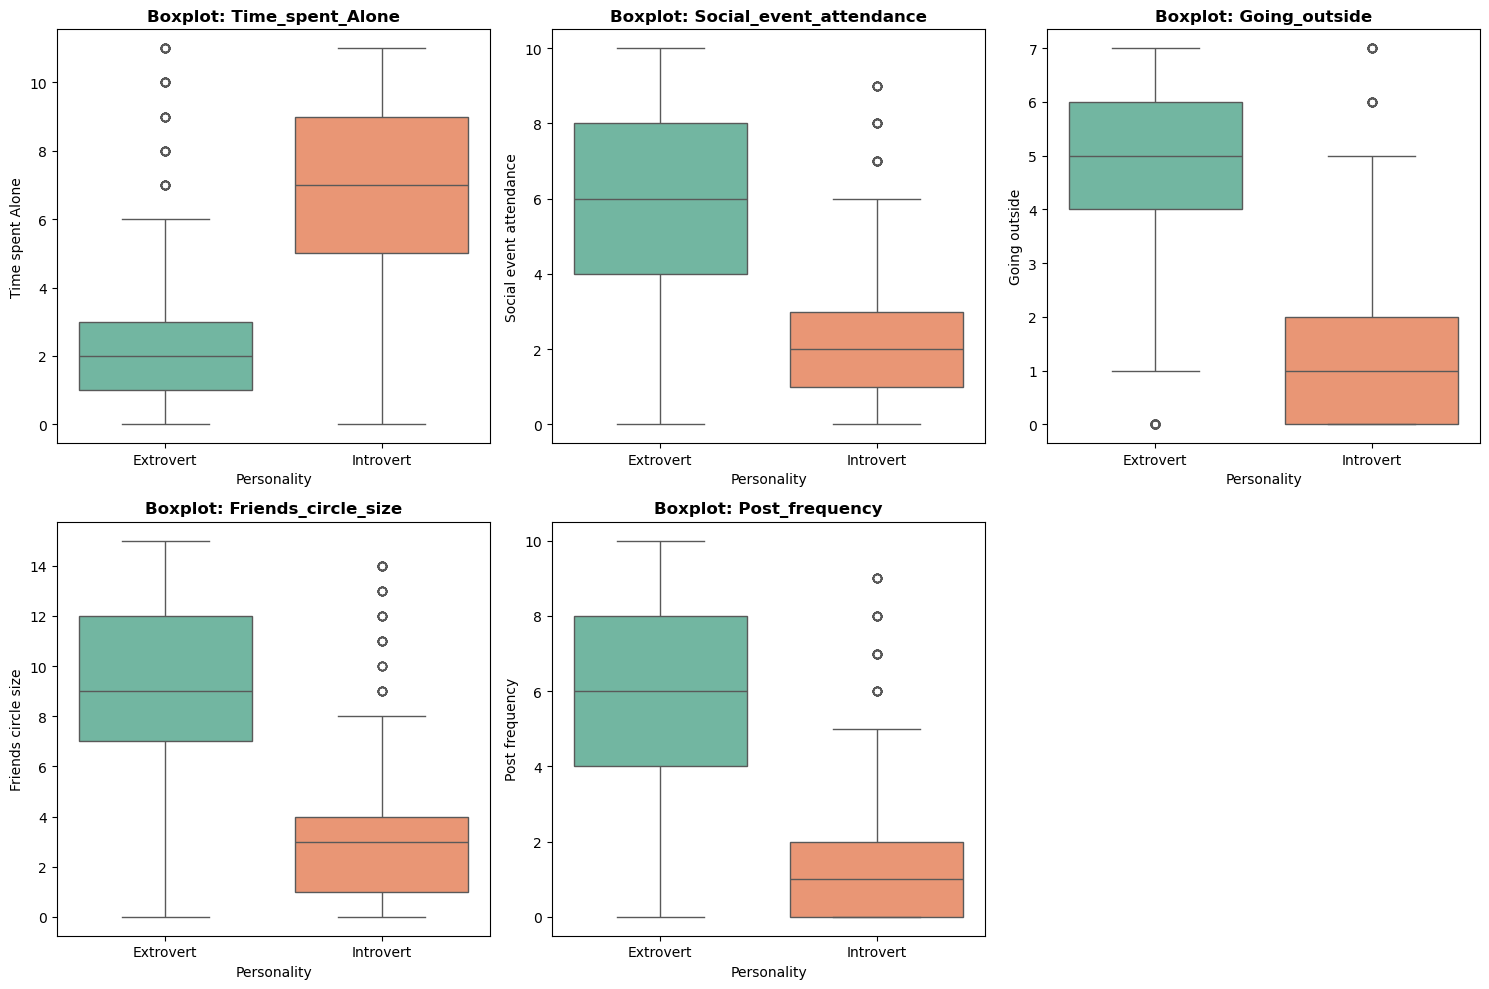

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    sns.boxplot(data=df, y=col, x='Personality', ax=ax, palette='Set2')
    ax.set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col.replace('_', ' '), fontsize=10)
    ax.set_xlabel('Personality', fontsize=10)

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


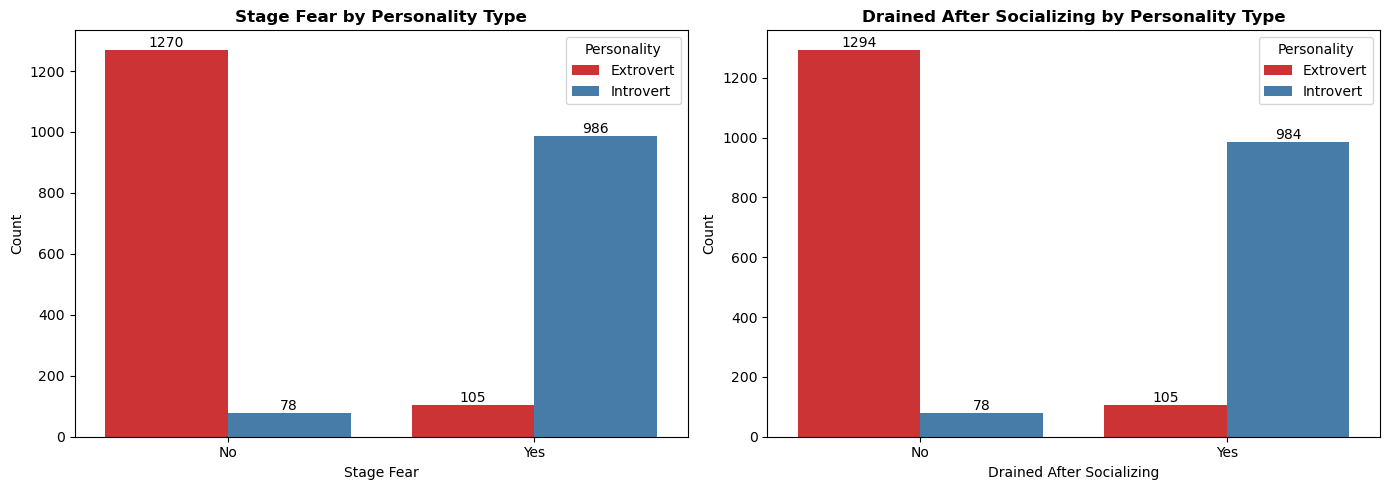

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stage Fear
sns.countplot(data=df, x='Stage_fear', hue='Personality', ax=axes[0], palette='Set1')
axes[0].set_title('Stage Fear by Personality Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Stage Fear', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Drained After Socializing
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', ax=axes[1], palette='Set1')
axes[1].set_title('Drained After Socializing by Personality Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Drained After Socializing', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

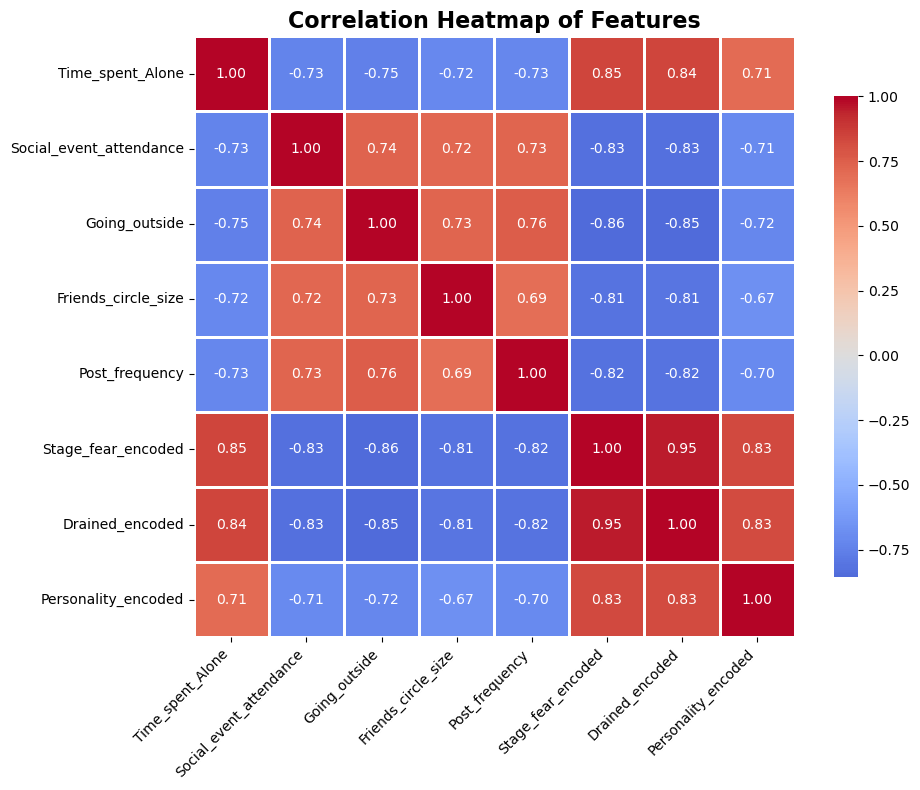

In [16]:
df_corr = df.copy()
df_corr['Personality_encoded'] = (df_corr['Personality'] == 'Introvert').astype(int)
df_corr['Stage_fear_encoded'] = (df_corr['Stage_fear'] == 'Yes').astype(int)
df_corr['Drained_encoded'] = (df_corr['Drained_after_socializing'] == 'Yes').astype(int)

correlation_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency', 'Stage_fear_encoded',
                   'Drained_encoded', 'Personality_encoded']

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\1270721544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Personality', y=col, ax=axes[idx], palette='muted')
C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\1270721544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Personality', y=col, ax=axes[idx], palette='muted')
C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\1270721544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Personality', y=col, ax=ax

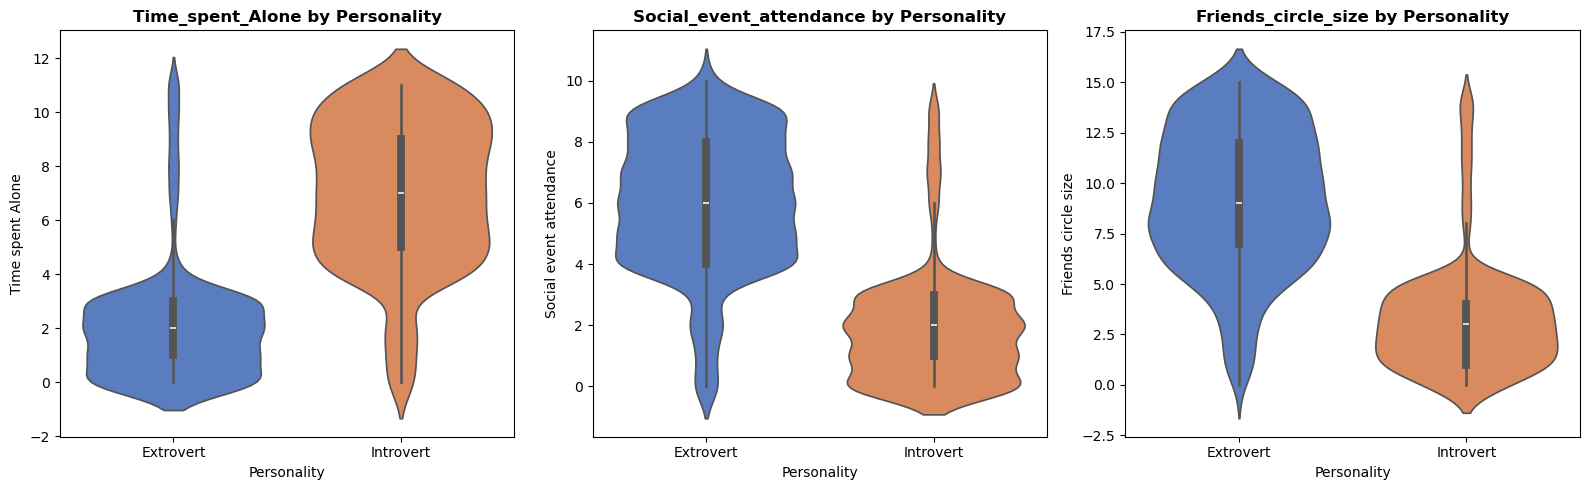

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
key_features = ['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']

for idx, col in enumerate(key_features):
    sns.violinplot(data=df, x='Personality', y=col, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'{col} by Personality', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col.replace('_', ' '), fontsize=10)

plt.tight_layout()
plt.show()


## 2. Data Preparation

In [19]:

target_col = "Personality"
X = df.drop(columns=[target_col])
y = df[target_col].astype(str)

numeric_features = X.select_dtypes(include=["int64","float64"]).columns
categorical_features = X.select_dtypes(include=["object","category"]).columns


## 3. Preprocessing

In [21]:

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


## 4. Train/Test Split

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=101, stratify=y 
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## 5. Train Models with Cross-Validation

In [25]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("clf", model)
    ])
    
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
    pipe.fit(X_train, y_train)
    
    test_preds = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    
    results[name] = {
        "model": pipe,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "test_accuracy": test_acc
    }
    
    print(f"{name} | CV Mean: {cv_scores.mean():.4f} | CV Std: {cv_scores.std():.4f} | Test Acc: {test_acc:.4f}")


Logistic Regression | CV Mean: 0.9119 | CV Std: 0.0041 | Test Acc: 0.9066
Random Forest | CV Mean: 0.9014 | CV Std: 0.0060 | Test Acc: 0.8946
Gradient Boosting | CV Mean: 0.9258 | CV Std: 0.0051 | Test Acc: 0.9245
AdaBoost | CV Mean: 0.9124 | CV Std: 0.0025 | Test Acc: 0.9105
Support Vector Machine | CV Mean: 0.9278 | CV Std: 0.0057 | Test Acc: 0.9245
K-Nearest Neighbors | CV Mean: 0.9154 | CV Std: 0.0072 | Test Acc: 0.9165
Decision Tree | CV Mean: 0.8457 | CV Std: 0.0080 | Test Acc: 0.8509


## 6. Cross-Validation & Test Accuracy Comparison

In [27]:

results_df = pd.DataFrame({
    "Model": results.keys(),
    "CV Mean Accuracy": [v["cv_mean"] for v in results.values()],
    "CV Std": [v["cv_std"] for v in results.values()],
    "Test Accuracy": [v["test_accuracy"] for v in results.values()]
}).sort_values(by="CV Mean Accuracy", ascending=False)

results_df


,Model,CV Mean Accuracy,CV Std,Test Accuracy
4,Support Vector Machine,0.927825,0.005673,0.924453
2,Gradient Boosting,0.925833,0.005078,0.924453
5,K-Nearest Neighbors,0.915383,0.007183,0.916501
3,AdaBoost,0.912393,0.002475,0.910537
0,Logistic Regression,0.911894,0.004088,0.906561
1,Random Forest,0.901442,0.006042,0.894632
6,Decision Tree,0.845702,0.008048,0.850895


C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\1901622332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='CV Mean Accuracy', y='Model',
C:\Users\Abdulrahman Yehya\AppData\Local\Temp\ipykernel_4048\1901622332.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Test Accuracy', y='Model',


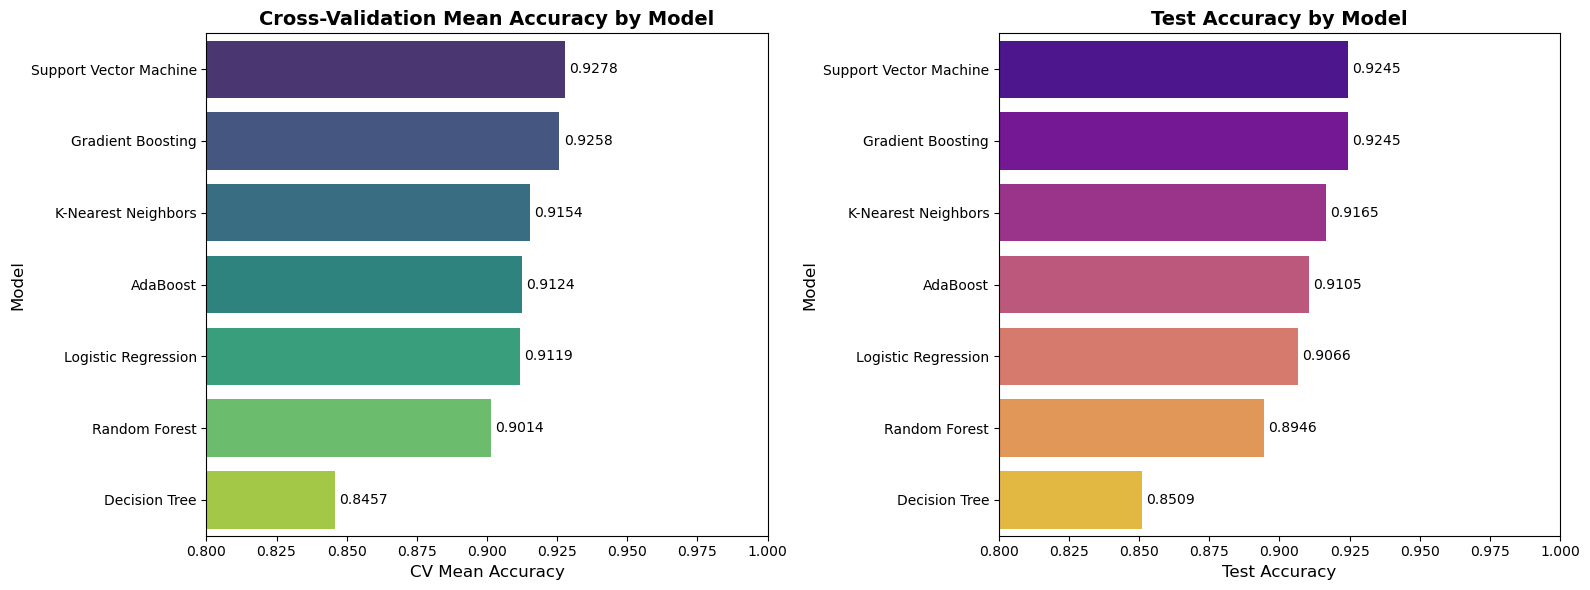

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CV Mean Accuracy
sns.barplot(data=results_df, x='CV Mean Accuracy', y='Model', 
            palette='viridis', ax=axes[0])
axes[0].set_title('Cross-Validation Mean Accuracy by Model', fontsize=14, fontweight='bold')
axes[0].set_xlabel('CV Mean Accuracy', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].set_xlim(0.8, 1.0)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.4f', padding=3)

# Test Accuracy
sns.barplot(data=results_df, x='Test Accuracy', y='Model', 
            palette='plasma', ax=axes[1])
axes[1].set_title('Test Accuracy by Model', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Test Accuracy', fontsize=12)
axes[1].set_ylabel('Model', fontsize=12)
axes[1].set_xlim(0.8, 1.0)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()


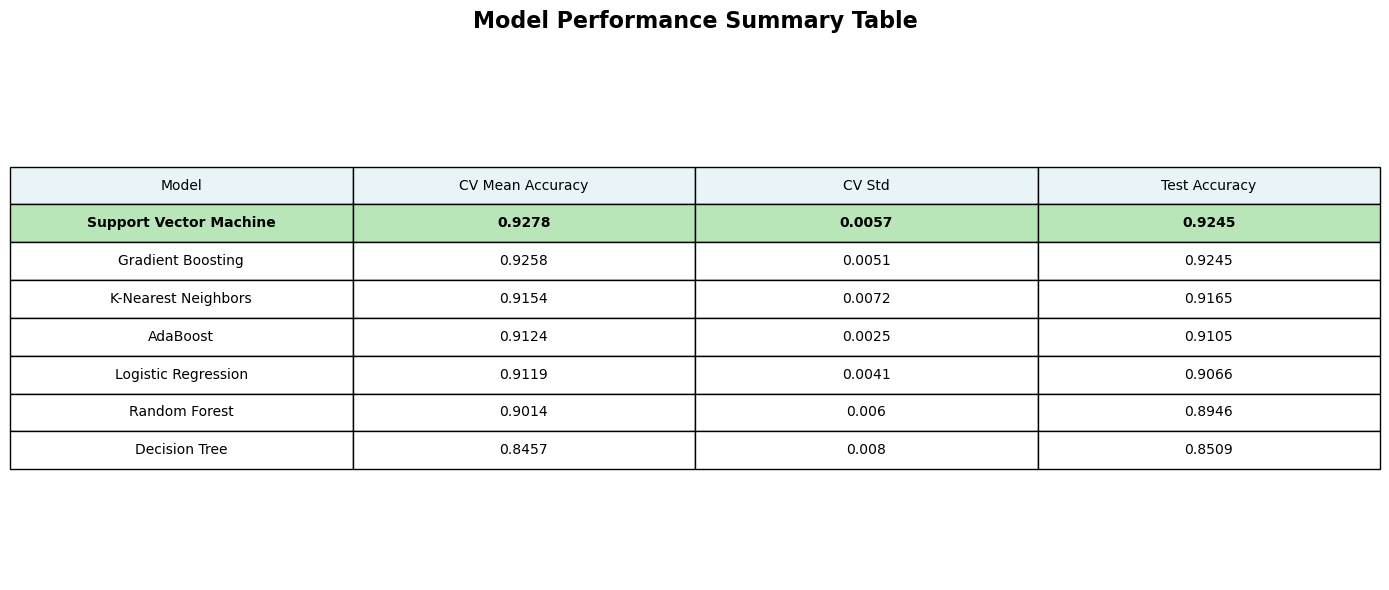

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

table_data = results_df.round(4).values
table = ax.table(cellText=table_data, 
                colLabels=results_df.columns,
                cellLoc='center',
                loc='center',
                colColours=['#E8F4F8']*len(results_df.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Highlight best model row
for i in range(len(results_df.columns)):
    table[(1, i)].set_facecolor('#B8E6B8')
    table[(1, i)].set_text_props(weight='bold')

plt.title('Model Performance Summary Table', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Select Best Model Based on Cross-Validation

In [31]:

best_model_name = results_df.iloc[0]["Model"]
best_model = results[best_model_name]["model"]

print("Best Model Selected:", best_model_name)


Best Model Selected: Support Vector Machine


## 8. Final Evaluation of Best Model

In [33]:

best_preds = best_model.predict(X_test)
print(classification_report(y_test, best_preds))


              precision    recall  f1-score   support

   Extrovert       0.93      0.94      0.93       284
   Introvert       0.92      0.91      0.91       219

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix

cm(y_test, best_preds)

array([[266,  18],
       [ 20, 199]], dtype=int64)

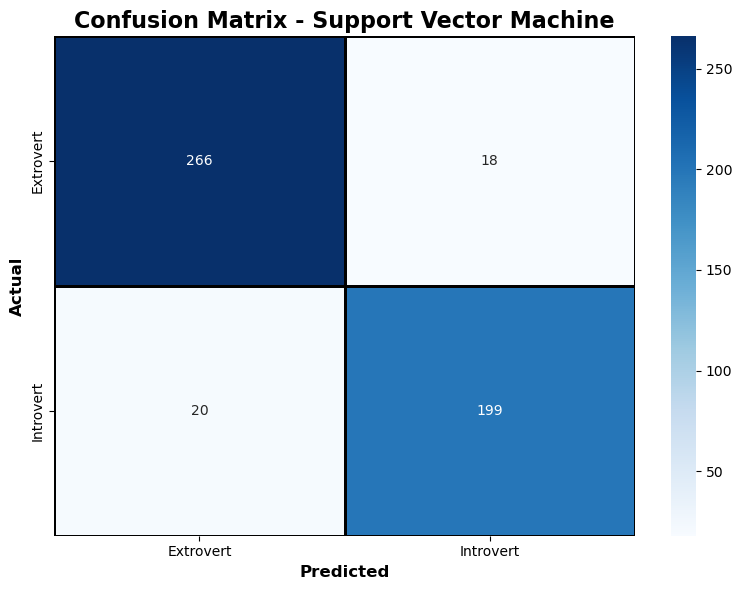


Confusion Matrix Breakdown:
True Negatives (Extrovert correctly predicted): 266
False Positives (Extrovert predicted as Introvert): 18
False Negatives (Introvert predicted as Extrovert): 20
True Positives (Introvert correctly predicted): 199

Misclassification Rate: 0.0755


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_preds)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Extrovert', 'Introvert'],
            yticklabels=['Extrovert', 'Introvert'],
            linewidths=2, linecolor='black', ax=ax)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate and display additional metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (Extrovert correctly predicted): {tn}")
print(f"False Positives (Extrovert predicted as Introvert): {fp}")
print(f"False Negatives (Introvert predicted as Extrovert): {fn}")
print(f"True Positives (Introvert correctly predicted): {tp}")
print(f"\nMisclassification Rate: {(fp + fn) / (tn + fp + fn + tp):.4f}")

## 9. Save Best Model

In [37]:

#joblib.dump(best_model, "final_model.pkl")
print("saved file final_model.pkl")



saved file final_model.pkl
